# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [5]:
# 데이터 로드
data = pd.read_csv("/Users/ijiseon/Desktop/abalone.csv.csv의 사본")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)


In [6]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,False,True,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,True,False,False
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,True,False,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,False,True,False


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data['M'])
data["M"] = le.transform(data["M"])

In [10]:
le.fit(data['F'])
data["F"] = le.transform(data["F"])

le.fit(data['I'])
data["I"] = le.transform(data["I"])

In [11]:
X = data.drop(["Rings"],axis=1)
Y = data["Rings"]

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [3]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [12]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [13]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [14]:
# alpha=0.3 으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=0.3)

#릿지모델 생성 및 훈련
ridge.fit(X_train, y_train)

#예측값 구하기
pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age_pred = 1.5+pred


#MSE와 RMSE구하기
from sklearn.metrics import mean_squared_error, r2_score 

age = 1.5+y_test
mse = mean_squared_error(age_pred, age)
rmse = np.sqrt(mse)

print(mse)
print(rmse)


4.645896617259628
2.155434206200604


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [15]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [17]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    #cross_val_score를 이용해 5 폴드의 평균 rmse를 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print("alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}".format(alpha, avg_rmse))    

alpha 0일 때 5 folds의 평균 RMSE : 2.236
alpha 0.1일 때 5 folds의 평균 RMSE : 2.231
alpha 1일 때 5 folds의 평균 RMSE : 2.230
alpha 10일 때 5 folds의 평균 RMSE : 2.373
alpha 100일 때 5 folds의 평균 RMSE : 2.633


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [18]:
# 필요한 모듈 임포트
import xgboost

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [19]:
#모델 생성 및 훈련

xgb_model = xgboost.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train,y_train)


#예측값 구하기
pred = xgb_model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age_pred = 1.5+pred


#MSE와 RMSE구하기
from sklearn.metrics import mean_squared_error, r2_score 

age = 1.5+y_test
mse = mean_squared_error(age_pred, age)
rmse = np.sqrt(mse)

print(mse)
print(rmse)



5.423484578469097
2.328837602425102


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

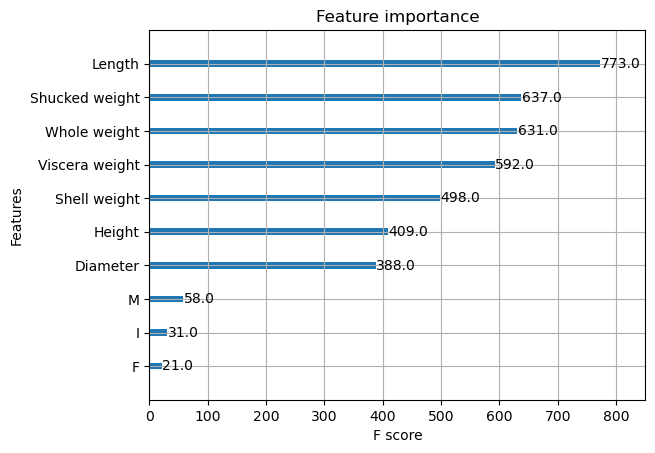

In [20]:
import seaborn as sns
%matplotlib inline

xgboost.plot_importance(xgb_model)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [21]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [26]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

In [37]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## 2) train/test 셋 분리

In [27]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [32]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [38]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [33]:
#기울기
lr_clf.coef_

array([[-1.99751119e-01,  3.65450383e-01,  1.49472044e-01,
        -1.88027136e-01, -2.28495947e-02,  1.95456399e-01,
         4.66701064e-01, -1.66796599e-02,  8.23896729e-02,
         6.75011000e-02, -1.92621794e-02,  2.94915620e-01,
         7.42524534e-03],
       [ 5.96475631e-01, -7.88672215e-01, -1.26181365e-01,
         2.12254718e-01, -1.13505004e-02,  3.15785774e-01,
         3.55147820e-01,  3.34675478e-02,  2.79035551e-01,
        -1.17202420e+00,  2.61165567e-01,  4.64731346e-01,
        -8.33632983e-03],
       [-3.96724513e-01,  4.23221832e-01, -2.32906785e-02,
        -2.42275819e-02,  3.42000951e-02, -5.11242173e-01,
        -8.21848883e-01, -1.67878879e-02, -3.61425224e-01,
         1.10452310e+00, -2.41903387e-01, -7.59646966e-01,
         9.11084487e-04]])

In [39]:
#절편
lr_clf.intercept_

array([-0.04177836,  0.09551042, -0.05373207])

3-3) 모델의 정확도를 구하세요.

In [36]:
#모델의 예측값 구하기
lr_preds = lr_clf.predict(x_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
print("accuracy: {:0.3f}".format(accuracy_score(y_test, lr_preds)))

accuracy: 0.963
